# Homework 4
Henry Starr

October 23rd

Data Cleaning

In [2]:
import pandas as pd
import numpy as np
import scipy as sp

In [3]:
max = pd.read_csv("/content/Dataset Generation (Max) (Responses) - Form Responses 1.csv")
fard = pd.read_csv("/content/Dataset Generation (Fardina) (Responses) - Form Responses 1.csv")

In [4]:
mdict = {
           "Timestamp": "timestamp",
           "What year are you?": "grade",
           "How old are you?": "age",
           "You could describe the adults you grew up with as...": "parent alignment",
           "You could describe yourself as...": "self alignment",
           "How would you rate your religiousness / spirituality?": "religiousness",
           "What bests represents your gender?": "gender",
           "My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?": "q1",
           "My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her down the aisle and while I am honored I told her no. Her step-dad practically raised her from a baby and I think that he deserves it far more than me. She was really upset and hurt when I said no. Am I a jerk?": "q2",
           "I'm a trust fund kid; I get a healthy 'allowance' from my parents, but I mostly sock it away since I don't really feel like I deserve it. I live with my girlfriend, who comes from a poor family, and we split things 50-50. Recently, she found out how much money my parents send me each month and freaked out, saying it wasn't fair that I was making her split things 50/50. I told her it was my money, and it only seems fair if we cover half the expenses. Am I a jerk?": "q3",
           "My wife and I have separate finances, but I pay for almost everything. My son starts school next year, and I'm planning on sending him to a private school. My wife's son currently goes to a much less nice public school. My wife says I'm a jerk for not paying for her daughter to go to private school as well.": "q4",
           "I saw a poster for a lost cat advertising a 500 dollar reward. I saw the cat, tracked it down, and called the owner. When I met with them, they said there wasn't actually a reward, they had just listed one because they thought it would motivate people to find the cat. I kept the cat until they coughed up the reward money. Am I a jerk?": "q5",
           "My sister's nine year old daughter is poorly behaved. One day, my sister dropped the daughter off on my doorstep without my consent and drove off, texting me that she needed me to watch her daughter for the day. The daughter complained of being hungry, so I gave her the leftovers I had. She said she didn't like them, but I told her that's all there was. She put them in the microwave until they burned, then told me she couldn't eat them and we would have to go out and get food. I told her that was what there was to eat, and if she ruined it she'd have to wait for her mom to get back. Later, everyone yelled at me for 'starving' a child. Am I a jerk?": "q6",
           "My parents want us to come out for their anniversary, and bought my sister and I tickets on the same flight. My sister has two kids - a 6 month old and a 5 year old. She is currently separated from her husband so she would have to handle 2 children by herself on a 10 hour flight.\n\nShe calls me up a week or so beforehand and asks me if I will be willing to help her take care of her kids on the flight, and something about taking shifts so we can both sleep. I tell her that I wasn't comfortable with that, but she says \"nephew loves you so much\" so we can work something out on the flight and hangs up.\n\nWhen I got to the airport, I chose to upgrade my seat so I could sit by myself and didn't mention it until we were on the plane. My family freaked and told me I abandoned my sister. Am I a jerk?": "q7",
           "I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?": "q8",
           "I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn't show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?": "q9",
           "One of my children wants to go to an expensive school to become a dentist. I told them I'd be fine paying for it. The other one wants to go to a similarly expensive school to become a teacher. I told her that I wouldn't pay for her schooling unless she picked a career path that will make at least 100,000 a year. Am I a jerk?": "q10",
           "I was in a conflict with my mother-in-law's boyfriend, in which I made a snide comment about he's never paid child support to his ex. Later, he called me and told me if I ever said anything like that ever again he'd sue me for defamation. I took the threat seriously, as he is a lawyer, and uninvited him for our wedding and told my family I couldn't be around him anymore. Am I a jerk?": "q11",
           "\nSome of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?": "q12",
           "My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I a jerk?": "q13",
           "My sister is going to be a bridesmaid at my wedding. Her hair was dyed, but she recently decided to grow it out, so parts of it are bleached and part are not. I told her it wouldn't look good in the pictures, and offered to pay for her to dye it. She said no, and I said she couldn't be in the wedding party. Am I a jerk?": "q14"
           }

fdict = {  "Timestamp": "timestamp",
           "What year are you?": "grade",
           "How old are you?": "age",
           "You could describe the adults you grew up with as...": "parent alignment",
           "You could describe yourself as...": "self alignment",
           "How would you rate your religiousness / spirituality?": "religiousness",
           "What bests represents your gender?": "gender",
           "My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?": "q1",
           "My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her down the aisle and while I am honored I told her no. Her step-dad practically raised her from a baby and I think that he deserves it far more than me. She was really upset and hurt when I said no. Am I a jerk?": "q2",
           "I'm a trust fund kid; I get a healthy 'allowance' from my parents, but I mostly sock it away since I don't really feel like I deserve it. I live with my girlfriend, who comes from a poor family, and we split things 50-50. Recently, she found out how much money my parents send me each month and freaked out, saying it wasn't fair that I was making her split things 50/50. I told her it was my money, and it only seems fair if we cover half the expenses. Am I a jerk?": "q3",
           "My wife and I have separate finances, but I pay for almost everything. My son starts school next year, and I'm planning on sending him to a private school. My wife's son currently goes to a much less nice public school. My wife says I'm a jerk for not paying for her daughter to go to private school as well.": "q4",
           "I saw a poster for a lost cat advertising a 500 dollar reward. I saw the cat, tracked it down, and called the owner. When I met with them, they said there wasn't actually a reward, they had just listed one because they thought it would motivate people to find the cat. I kept the cat until they coughed up the reward money. Am I a jerk?": "q5",
           "My sister's nine year old daughter is poorly behaved. One day, my sister dropped the daughter off on my doorstep without my consent and drove off, texting me that she needed me to watch her daughter for the day. The daughter complained of being hungry, so I gave her the leftovers I had. She said she didn't like them, but I told her that's all there was. She put them in the microwave until they burned, then told me she couldn't eat them and we would have to go out and get food. I told her that was what there was to eat, and if she ruined it she'd have to wait for her mom to get back. Later, everyone yelled at me for 'starving' a child. Am I a jerk?": "q6",
           "My parents want us to come out for their anniversary, and bought my sister and I tickets on the same flight. My sister has two kids - a 6 month old and a 5 year old. She is currently separated from her husband so she would have to handle 2 children by herself on a 10 hour flight.\n\nShe calls me up a week or so beforehand and asks me if I will be willing to help her take care of her kids on the flight, and something about taking shifts so we can both sleep. I tell her that I wasn't comfortable with that, but she says \"nephew loves you so much\" so we can work something out on the flight and hangs up.\n\nWhen I got to the airport, I chose to upgrade my seat so I could sit by myself and didn't mention it until we were on the plane. My family freaked and told me I abandoned my sister. Am I a jerk?": "q7",
           "I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?": "q8",
           "I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn't show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?": "q9",
           "One of my children wants to go to an expensive school to become a dentist. I told them I'd be fine paying for it. The other one wants to go to a similarly expensive school to become a teacher. I told her that I wouldn't pay for her schooling unless she picked a career path that will make at least 100,000 a year. Am I a jerk?": "q10",
           "I was in a conflict with my mother-in-law's boyfriend, in which I made a snide comment about he's never paid child support to his ex. Later, he called me and told me if I ever said anything like that ever again he'd sue me for defamation. I took the threat seriously, as he is a lawyer, and uninvited him for our wedding and told my family I couldn't be around him anymore. Am I a jerk?": "q11",
           "\nSome of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?": "q12",
           "My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I jerk?": "q13",
           "My sister is going to be a bridesmaid at my wedding. Her hair was dyed, but she recently decided to grow it out, so parts of it are bleached and part are not. I told her it wouldn't look good in the pictures, and offered to pay for her to dye it. She said no, and I said she couldn't be in the wedding party. Am I a jerk?": "q14",
           "Would you describe yourself as compassionate?": "primer"}

max = max.rename(columns = mdict)
fard = fard.rename(columns = fdict)
fard


,timestamp,grade,age,parent alignment,self alignment,religiousness,gender,primer,q1,q2,...,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14
0,9/23/2023 18:01:01,Junior,20,Mildly conservative,Mildly conservative,Not spiritual at all,Male,Yes,Strongly a jerk,Mildly a jerk,...,Mildly a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Mildly a jerk
1,9/23/2023 18:01:08,Junior,20,Mildly liberal,Mildly liberal,Not spiritual at all,Male,Yes,Mildly a jerk,Mildly a jerk,...,Mildly a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk
2,9/23/2023 18:08:57,Junior,20,Mildly conservative,Mildly conservative,Somewhat spiritual,Male,Yes,Not a jerk,Not a jerk,...,Not a jerk,Mildly a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Strongly a jerk
3,9/23/2023 18:09:57,Senior,22,Mildly liberal,Mildly liberal,Not spiritual at all,Famale,Yes,Mildly a jerk,Not a jerk,...,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk
4,9/23/2023 18:10:01,Senior,23,Mildly liberal,Strongly liberal,Not spiritual at all,Male,Yes,Mildly a jerk,Mildly a jerk,...,Mildly a jerk,Not a jerk,Mildly a jerk,NaN,NaN,Mildly a jerk,Not a jerk,NaN,NaN,Strongly a jerk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,10/9/2023 22:38:26,Junior,20,Mildly liberal,Mildly liberal,Not spiritual at all,Female,No,Not a jerk,Mildly a jerk,...,Not a jerk,Strongly a jerk,Strongly a jerk,Not a jerk,Strongly a jerk,Not a jerk,Strongly a jerk,Mildly a jerk,Mildly a jerk,Strongly a jerk
132,10/10/2023 19:30:14,Junior,19,Mildly conservative,Don't know / It's complicated,Not spiritual at all,Male,Yes,Mildly a jerk,Not a jerk,...,Strongly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk
133,10/10/2023 22:13:14,Junior,20,Mildly liberal,Mildly liberal,Somewhat spiritual,Male,Yes,Mildly a jerk,Mildly a jerk,...,Not a jerk,Strongly a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Strongly a jerk
134,10/16/2023 12:58:41,Junior,21,Mildly conservative,Neutral,Somewhat spiritual,Male,Yes,Not a jerk,Not a jerk,...,Mildly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Mildly a jerk,Strongly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk


In [5]:
#Data Cleaning

max["grade"] = max["grade"].dropna()
fard["grade"] = fard["grade"].dropna()

#Removing max data where the grade is other. Other is not useful when making
#any inferences with regard to the data.
max = max[max["grade"] != "Other"]


#This removes the NaNs from the dataset. There is still enough data left, so this is OK to make the data easier to work with.
max = max.dropna()
fard = fard.dropna()

#delete freshman columns
fard = fard[fard["grade"] != "Freshmen"]
fard


,timestamp,grade,age,parent alignment,self alignment,religiousness,gender,primer,q1,q2,...,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14
0,9/23/2023 18:01:01,Junior,20,Mildly conservative,Mildly conservative,Not spiritual at all,Male,Yes,Strongly a jerk,Mildly a jerk,...,Mildly a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Mildly a jerk
1,9/23/2023 18:01:08,Junior,20,Mildly liberal,Mildly liberal,Not spiritual at all,Male,Yes,Mildly a jerk,Mildly a jerk,...,Mildly a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk
2,9/23/2023 18:08:57,Junior,20,Mildly conservative,Mildly conservative,Somewhat spiritual,Male,Yes,Not a jerk,Not a jerk,...,Not a jerk,Mildly a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Strongly a jerk
3,9/23/2023 18:09:57,Senior,22,Mildly liberal,Mildly liberal,Not spiritual at all,Famale,Yes,Mildly a jerk,Not a jerk,...,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk
5,9/23/2023 18:10:13,Other,25,Mildly conservative,Mildly conservative,Not spiritual at all,Male,Yes,Mildly a jerk,Not a jerk,...,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Strongly a jerk,Strongly a jerk,Not a jerk,Mildly a jerk,Not a jerk,Mildly a jerk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,10/9/2023 22:38:26,Junior,20,Mildly liberal,Mildly liberal,Not spiritual at all,Female,No,Not a jerk,Mildly a jerk,...,Not a jerk,Strongly a jerk,Strongly a jerk,Not a jerk,Strongly a jerk,Not a jerk,Strongly a jerk,Mildly a jerk,Mildly a jerk,Strongly a jerk
132,10/10/2023 19:30:14,Junior,19,Mildly conservative,Don't know / It's complicated,Not spiritual at all,Male,Yes,Mildly a jerk,Not a jerk,...,Strongly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk
133,10/10/2023 22:13:14,Junior,20,Mildly liberal,Mildly liberal,Somewhat spiritual,Male,Yes,Mildly a jerk,Mildly a jerk,...,Not a jerk,Strongly a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Strongly a jerk
134,10/16/2023 12:58:41,Junior,21,Mildly conservative,Neutral,Somewhat spiritual,Male,Yes,Not a jerk,Not a jerk,...,Mildly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Mildly a jerk,Strongly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk


In [6]:
max["age"].dtype
max['age'] = pd.to_numeric(max["age"])
max["age"].dtype

dtype('int64')

In [7]:
max.columns
arr = ['timestamp', 'grade', 'age', 'parent alignment', 'self alignment',
       'religiousness', 'gender', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7',
       'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14']

In [8]:
#Merging the datasets
df = pd.merge(max, fard, on=arr, how='outer')
df

,timestamp,grade,age,parent alignment,self alignment,religiousness,gender,q1,q2,q3,...,q6,q7,q8,q9,q10,q11,q12,q13,q14,primer
0,9/23/2023 17:58:09,Junior,20,Mildly liberal,Mildly liberal,Not spiritual at all,Male,Not a jerk,Not a jerk,Mildly a jerk,...,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,NaN
1,9/23/2023 18:02:48,Junior,20,Mildly conservative,Mildly liberal,Not spiritual at all,Male,Mildly a jerk,Not a jerk,Strongly a jerk,...,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Mildly a jerk,Strongly a jerk,Strongly a jerk,NaN
2,9/23/2023 18:03:20,Sophmore,19,Mildly conservative,Mildly conservative,Strongly spiritual,Male,Mildly a jerk,Mildly a jerk,Strongly a jerk,...,Not a jerk,Strongly a jerk,Not a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Strongly a jerk,Not a jerk,NaN
3,9/23/2023 18:06:57,Senior,21,Strongly liberal,Strongly liberal,Not spiritual at all,Male,Not a jerk,Mildly a jerk,Not a jerk,...,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,NaN
4,9/23/2023 18:10:13,Junior,20,Neutral,Neutral,Somewhat spiritual,Male,Not a jerk,Not a jerk,Mildly a jerk,...,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Strongly a jerk,Strongly a jerk,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,10/9/2023 22:38:26,Junior,20,Mildly liberal,Mildly liberal,Not spiritual at all,Female,Not a jerk,Mildly a jerk,Not a jerk,...,Strongly a jerk,Strongly a jerk,Not a jerk,Strongly a jerk,Not a jerk,Strongly a jerk,Mildly a jerk,Mildly a jerk,Strongly a jerk,No
206,10/10/2023 19:30:14,Junior,19,Mildly conservative,Don't know / It's complicated,Not spiritual at all,Male,Mildly a jerk,Not a jerk,Mildly a jerk,...,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Yes
207,10/10/2023 22:13:14,Junior,20,Mildly liberal,Mildly liberal,Somewhat spiritual,Male,Mildly a jerk,Mildly a jerk,Mildly a jerk,...,Strongly a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Yes
208,10/16/2023 12:58:41,Junior,21,Mildly conservative,Neutral,Somewhat spiritual,Male,Not a jerk,Not a jerk,Not a jerk,...,Not a jerk,Not a jerk,Mildly a jerk,Mildly a jerk,Strongly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Yes


In [9]:
#Fixing the "Famale" error
df["gender"] = df["gender"].apply(lambda x: "Female" if x == "Famale" else x)
df["gender"].value_counts()

Male                  154
Female                 49
Non-binary / other      5
Prefer not to say       2
Name: gender, dtype: int64

#Three Interesting Questions

1. Does sprituality give more or less leniency towards painting an individual as a jerk? Is there some correlation?

2. Does a students gender have any correlation in calling the husband a jerk when the question is relating towards the husband's wife?

3. Does political affiliation correlate with how compassionate somebody is despite it being a priming question?


#Question One
My initial thought is that spiritual individuals may call an individual a jerk less of the time, since they could be more forgiving people based off their sprituality. I will be looking at three arbitrary question results to answer this question

In [10]:
q2df = df
q2df["spiritualness"] = q2df["religiousness"].apply(lambda x: "Yes" if x != "Not spiritual at all" else "No")
q2df["spiritualness"].value_counts()

q2df["q2"].value_counts()
q2df["q1"] = q2df["q1"].apply(lambda x: 2 if x == "Not a jerk" else (1 if x == "Mildly a jerk" else 0))
q2df["q2"] = q2df["q2"].apply(lambda x: 2 if x == "Not a jerk" else (1 if x == "Mildly a jerk" else 0))
q2df["q3"] = q2df["q3"].apply(lambda x: 2 if x == "Not a jerk" else (1 if x == "Mildly a jerk" else 0))
q2df["q4"] = q2df["q4"].apply(lambda x: 2 if x == "Not a jerk" else (1 if x == "Mildly a jerk" else 0))
q2df.head(20)


,timestamp,grade,age,parent alignment,self alignment,religiousness,gender,q1,q2,q3,...,q7,q8,q9,q10,q11,q12,q13,q14,primer,spiritualness
0,9/23/2023 17:58:09,Junior,20,Mildly liberal,Mildly liberal,Not spiritual at all,Male,2,2,1,...,Mildly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,NaN,No
1,9/23/2023 18:02:48,Junior,20,Mildly conservative,Mildly liberal,Not spiritual at all,Male,1,2,0,...,Strongly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Mildly a jerk,Strongly a jerk,Strongly a jerk,NaN,No
2,9/23/2023 18:03:20,Sophmore,19,Mildly conservative,Mildly conservative,Strongly spiritual,Male,1,1,0,...,Strongly a jerk,Not a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Strongly a jerk,Not a jerk,NaN,Yes
3,9/23/2023 18:06:57,Senior,21,Strongly liberal,Strongly liberal,Not spiritual at all,Male,2,1,2,...,Mildly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,NaN,No
4,9/23/2023 18:10:13,Junior,20,Neutral,Neutral,Somewhat spiritual,Male,2,2,1,...,Mildly a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Strongly a jerk,Strongly a jerk,NaN,Yes
5,9/23/2023 18:20:01,Junior,20,Mildly conservative,Mildly liberal,Not spiritual at all,Male,1,0,1,...,Strongly a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Not a jerk,NaN,No
6,9/23/2023 18:23:18,Junior,20,Don't know / It's complicated,Don't know / It's complicated,Strongly spiritual,Prefer not to say,2,1,1,...,Strongly a jerk,Not a jerk,Strongly a jerk,Strongly a jerk,Not a jerk,Strongly a jerk,Strongly a jerk,Mildly a jerk,NaN,Yes
7,9/23/2023 18:26:54,Junior,20,Mildly conservative,Mildly conservative,Strongly spiritual,Male,2,1,2,...,Mildly a jerk,Strongly a jerk,Not a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Mildly a jerk,Strongly a jerk,NaN,Yes
8,9/23/2023 18:31:15,Senior,21,Strongly conservative,Mildly liberal,Not spiritual at all,Male,0,1,1,...,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Mildly a jerk,Mildly a jerk,Mildly a jerk,Strongly a jerk,NaN,No
9,9/23/2023 18:39:27,Junior,21,Neutral,Mildly liberal,Not spiritual at all,Male,2,1,2,...,Mildly a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Not a jerk,Mildly a jerk,Not a jerk,Strongly a jerk,NaN,No


In [11]:
q2df["forgiveness"] = q2df[["q1", "q2", "q3", "q4"]].sum(axis=1)

t = pd.crosstab(q2df["religiousness"], q2df["forgiveness"])
t

forgiveness,0,1,2,3,4,5,6,7,8
religiousness,,,,,,,,,
Not spiritual at all,0,0,3,6,21,22,21,12,4
Somewhat spiritual,1,1,3,8,15,19,19,15,7
Strongly spiritual,0,0,2,6,5,8,8,3,1


In [12]:
x = q2df["forgiveness"].value_counts()


In [13]:
import seaborn as sns

In [14]:
import matplotlib.pyplot as plt
import plotly.express as px


In [15]:
q2df["forgiveness"]

0      6
1      3
2      3
3      5
4      6
      ..
205    5
206    6
207    4
208    8
209    4
Name: forgiveness, Length: 210, dtype: int64

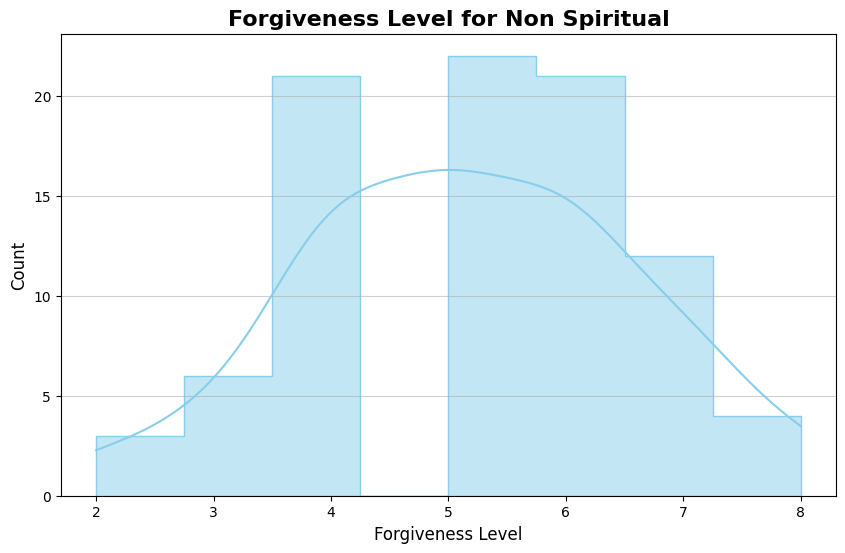

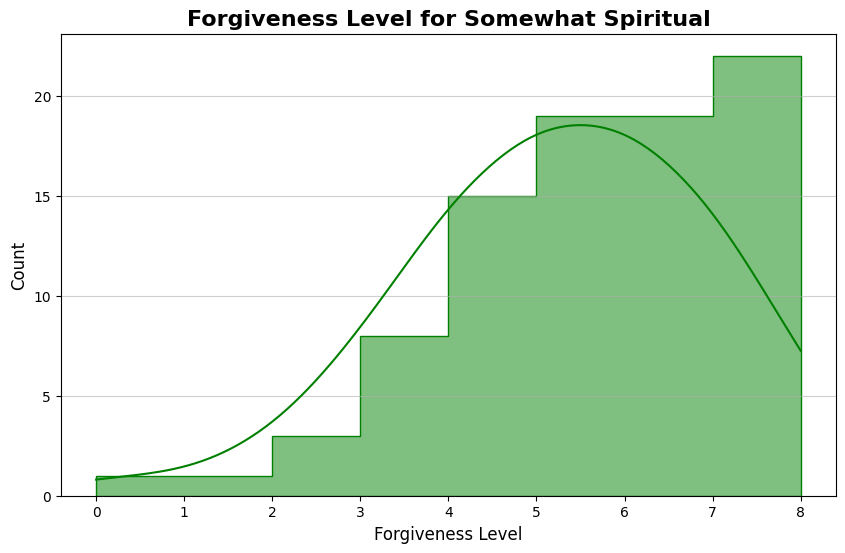

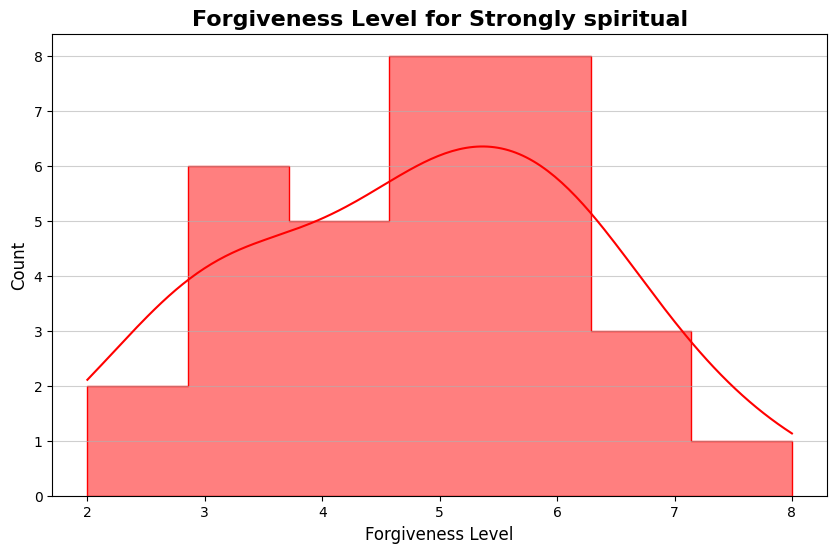

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

n = q2df[q2df["religiousness"] == "Not spiritual at all"]
n2 = q2df[q2df["religiousness"] == "Somewhat spiritual"]
n3 = q2df[q2df["religiousness"] == "Strongly spiritual"]




# Create a gradient color palette
colors = sns.color_palette("viridis", n_colors=len(df))

# Create a visually appealing stacked bar chart
plt.figure(figsize=(10, 6))
sns.histplot(n["forgiveness"],color='skyblue', kde=True, element='step', fill=True, common_norm=False)

# Customize the chart
plt.title("Forgiveness Level for Non Spiritual", fontsize=16, fontweight='bold')
plt.xlabel("Forgiveness Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='-', alpha=0.6)

# Show the chart
plt.show()

# Create a gradient color palette
colors = sns.color_palette("viridis", n_colors=len(df))

# Create a visually appealing stacked bar chart
plt.figure(figsize=(10, 6))
sns.histplot(n2["forgiveness"],color='green', kde=True, element='step', fill=True, common_norm=False)

# Customize the chart
plt.title("Forgiveness Level for Somewhat Spiritual", fontsize=16, fontweight='bold')
plt.xlabel("Forgiveness Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='-', alpha=0.6)

# Show the chart
plt.show()

# Create a gradient color palette
colors = sns.color_palette("viridis", n_colors=len(df))

# Create a visually appealing stacked bar chart
plt.figure(figsize=(10, 6))
sns.histplot(n3["forgiveness"],color='red', kde=True, element='step', fill=True, common_norm=False)

# Customize the chart
plt.title("Forgiveness Level for Strongly spiritual", fontsize=16, fontweight='bold')
plt.xlabel("Forgiveness Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='-', alpha=0.6)

# Show the chart
plt.show()

According to these given graphs, the answer to the question whether more spritual people are more forgiving will be no. It appears that there is no correlation.

#Question Two

My initial thought is that female respondants may be more willing to call the husband a jerk. I'll likely do a chi-squared hypothesis test to answer this question.
I'll be analyzing question 13, which involves the wife forbidding the husband from drinking alcohol

For the purpose of this test, I will be removing Non/binary/other and prefer not to say results from the gender questions.

In [17]:
q1df = df[df["gender"] != "Non-binary / other"]
q1df = q1df[q1df["gender"] != "Prefer not to say"]

In [18]:
t = pd.crosstab(q1df["q13"], q1df["gender"])
t

gender,Female,Male
q13,,
Mildly a jerk,17,56
Not a jerk,4,21
Strongly a jerk,28,77


Null Hypothesis: Gender and Degree of being a Jerk are independant variables.

Alternate Hypothesis: There is a significant statistical association between gender and rating somebody being a jerk.

In [19]:
sp.stats.chi2_contingency([t["Female"], t["Male"]])

Chi2ContingencyResult(statistic=1.2996430053964303, pvalue=0.522138968840596, dof=2, expected_freq=array([[17.62068966,  6.03448276, 25.34482759],
       [55.37931034, 18.96551724, 79.65517241]]))

Since the p value of this chi squared test is 0.522, we must fail to reject the null hypothesis that there is a no association.

So, the answer to the question is no, there is not a huge association between gender and calling this man a jerk or not for this question, where the wife is the subject in question. It is important to note that there could be some correlation, but not enough to reject the null hypothesis.

#Question 3

My third question is:
Does political affiliation correlate with how compassionate somebody is despite it being a priming question?

To answer this question I will be looking at the value counts of their forgiveness level versus their political association

In [20]:
q3df = df.dropna()

t = pd.crosstab(q3df["self alignment"], q3df["forgiveness"])

t

forgiveness,2,3,4,5,6,7,8
self alignment,,,,,,,
Don't know / It's complicated,0,1,0,1,5,1,1
Mildly conservative,0,1,2,4,5,1,1
Mildly liberal,1,3,12,16,9,9,3
Neutral,1,3,6,4,6,6,3
Strongly conservative,1,0,1,2,0,0,0
Strongly liberal,1,4,7,4,3,1,0


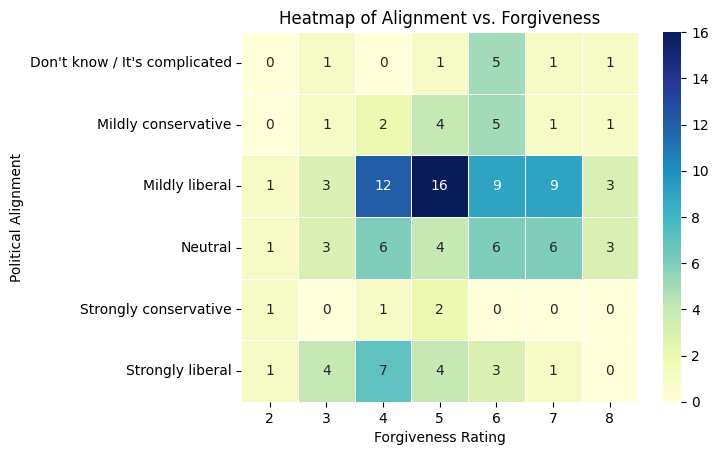

In [23]:
sns.heatmap(t, annot=True, cmap='YlGnBu', fmt='g', linewidths=0.5)
plt.title("Heatmap of Alignment vs. Forgiveness")
plt.xlabel("Forgiveness Rating")
plt.ylabel("Political Alignment")
plt.show()

No according to this crosstab, there seems to be no correlation between political association and their relative forgiveness level. Mildly liberal audiences tend to be around the middle level of forgiving, while strongly liberal tend to lean on the lower end of being forgiving. Mildly conservative individuals also lean into the middle of the distribution. There are not enough strongly conservative responses to gather an accurate answer. Neutral individuals are spread out and do not lean to either one side or another.

Overall, it seems like there is no statistical correlation when answering this question.